<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.730401,92.071158,22.472910,0.133333,223.407803,223.296883,0.110921
1,0.0,1.0,78.803327,29.670409,75.584711,-0.026675,194.031771,194.067209,-0.035438
2,0.0,2.0,23.803060,69.813853,92.551144,-0.033604,196.134453,196.165636,-0.031183
3,0.0,3.0,49.474315,87.150058,86.193274,0.099594,232.917239,232.822715,0.094525
4,0.0,4.0,46.489228,90.718497,24.612332,0.032606,171.852663,171.830522,0.022141
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.950584,40.003692,83.336392,0.019976,193.310644,193.302012,0.008633
249996,999.0,246.0,31.119727,61.015642,30.027277,0.012844,132.175490,132.149310,0.026180
249997,999.0,247.0,33.056758,68.938380,54.406092,0.049804,166.451033,166.388223,0.062810
249998,999.0,248.0,27.637739,83.569321,93.802818,-0.002784,215.007094,214.994097,0.012997


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.730401  92.071158  22.472910  0.133333  223.407803   
      1.0    78.803327  29.670409  75.584711 -0.026675  194.031771   
      2.0    23.803060  69.813853  92.551144 -0.033604  196.134453   
      3.0    49.474315  87.150058  86.193274  0.099594  232.917239   
      4.0    46.489228  90.718497  24.612332  0.032606  171.852663   
...                ...        ...        ...       ...         ...   
999.0 245.0  59.950584  40.003692  83.336392  0.019976  193.310644   
      246.0  31.119727  61.015642  30.027277  0.012844  132.175490   
      247.0  33.056758  68.938380  54.406092  0.049804  166.451033   
      248.0  27.637739  83.569321  93.802818 -0.002784  215.007094   
      249.0  77.327632  95.986937  39.852502 -0.028393  223.138678   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.296883  0.110921  
      1.0    194.067209 -0.035438  
      2.0    196.165636 -0.031183  
      3.0    232.822715  0.094525  
      4.0    171.830522  0.022141  
...                 ...       ...  
999.0 245.0  193.302012  0.008633  
      246.0  132.149310  0.026180  
      247.0  166.388223  0.062810  
      248.0  214.994097  0.012997  
      249.0  223.153351 -0.014674  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.730401  92.071158  22.472910  0.133333  223.407803   
      1.0    78.803327  29.670409  75.584711 -0.026675  194.031771   
      2.0    23.803060  69.813853  92.551144 -0.033604  196.134453   
      3.0    49.474315  87.150058  86.193274  0.099594  232.917239   
      4.0    46.489228  90.718497  24.612332  0.032606  171.852663   
...                ...        ...        ...       ...         ...   
999.0 245.0  59.950584  40.003692  83.336392  0.019976  193.310644   
      246.0  31.119727  61.015642  30.027277  0.012844  132.175490   
      247.0  33.056758  68.938380  54.406092  0.049804  166.451033   
      248.0  27.637739  83.569321  93.802818 -0.002784  215.007094   
      249.0  77.327632  95.986937  39.852502 -0.028393  223.138678   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.296883  0.110921  
      1.0    194.067209 -0.035438  
      2.0    196.165636 -0.031183  
      3.0    232.822715  0.094525  
      4.0    171.830522  0.022141  
...                 ...       ...  
999.0 245.0  193.302012  0.008633  
      246.0  132.149310  0.026180  
      247.0  166.388223  0.062810  
      248.0  214.994097  0.012997  
      249.0  223.153351 -0.014674  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.730401,92.071158,22.472910,0.133333,223.407803,223.296883,0.110921
1,0.0,1.0,78.803327,29.670409,75.584711,-0.026675,194.031771,194.067209,-0.035438
2,0.0,2.0,23.803060,69.813853,92.551144,-0.033604,196.134453,196.165636,-0.031183
3,0.0,3.0,49.474315,87.150058,86.193274,0.099594,232.917239,232.822715,0.094525
4,0.0,4.0,46.489228,90.718497,24.612332,0.032606,171.852663,171.830522,0.022141
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.950584,40.003692,83.336392,0.019976,193.310644,193.302012,0.008633
249996,999.0,246.0,31.119727,61.015642,30.027277,0.012844,132.175490,132.149310,0.026180
249997,999.0,247.0,33.056758,68.938380,54.406092,0.049804,166.451033,166.388223,0.062810
249998,999.0,248.0,27.637739,83.569321,93.802818,-0.002784,215.007094,214.994097,0.012997


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    98.730401  92.071158  22.472910  0.133333  223.407803   
      1.0    78.803327  29.670409  75.584711 -0.026675  194.031771   
      2.0    23.803060  69.813853  92.551144 -0.033604  196.134453   
      3.0    49.474315  87.150058  86.193274  0.099594  232.917239   
      4.0    46.489228  90.718497  24.612332  0.032606  171.852663   
...                ...        ...        ...       ...         ...   
999.0 245.0  59.950584  40.003692  83.336392  0.019976  193.310644   
      246.0  31.119727  61.015642  30.027277  0.012844  132.175490   
      247.0  33.056758  68.938380  54.406092  0.049804  166.451033   
      248.0  27.637739  83.569321  93.802818 -0.002784  215.007094   
      249.0  77.327632  95.986937  39.852502 -0.028393  223.138678   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.296883  0.110921  
      1.0    194.067209 -0.035438  
      2.0    196.165636 -0.031183  
      3.0    232.822715  0.094525  
      4.0    171.830522  0.022141  
...                 ...       ...  
999.0 245.0  193.302012  0.008633  
      246.0  132.149310  0.026180  
      247.0  166.388223  0.062810  
      248.0  214.994097  0.012997  
      249.0  223.153351 -0.014674  

[250000 rows x 7 columns]

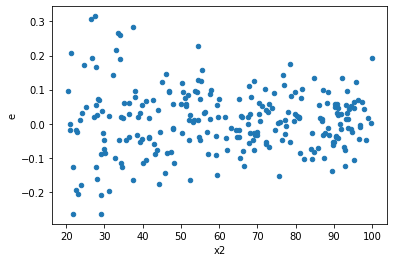

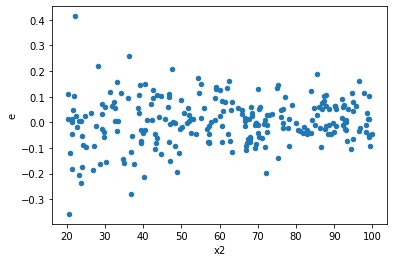

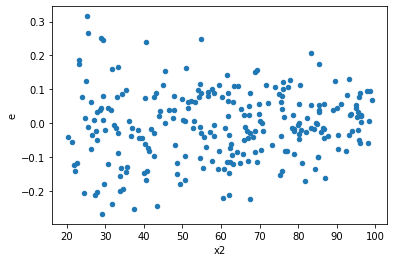

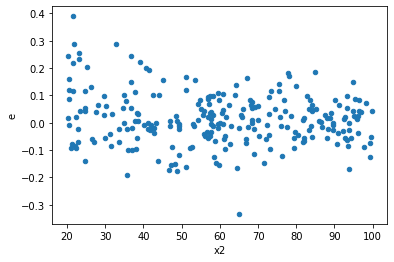

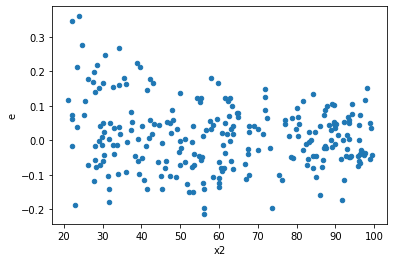

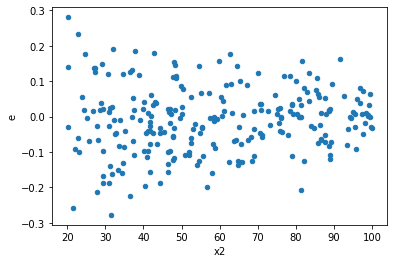

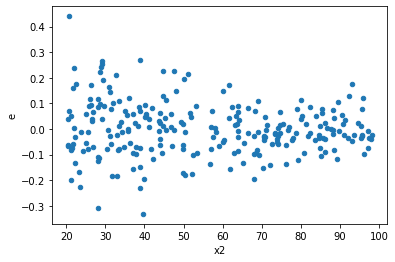

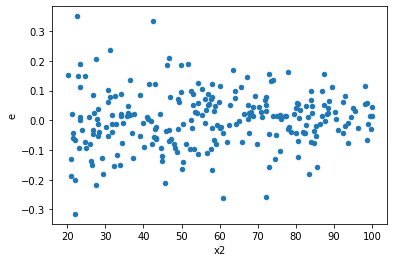

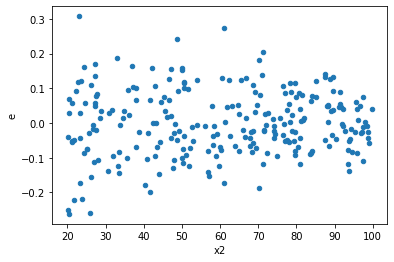

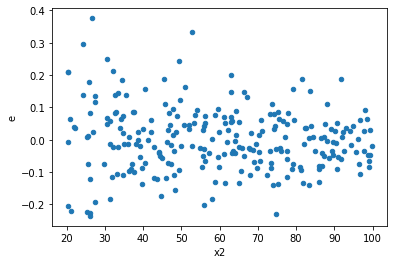

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,130.0,114.0,0.9577689406679832,1.6286929735992195,0.0073674533897537175,0.014286780470168592,1.939174870116983,0.0003428468777830762,0.9998285765611085,0.0001714234388915381,Reject001=0 : Heteroscedasticity
3.0,129.0,115.0,0.9004578125950343,1.2439950065865977,0.006980293120891739,0.010817347883361719,1.5496982284290939,0.01696451765193774,0.9915177411740311,0.00848225882596887,Reject001=1 : Homoscedasticity
4.0,111.0,133.0,0.8193459629333851,1.4404025738391835,0.007381495161562029,0.010830094540144237,1.4671952366155092,0.03439868931307588,0.9828006553434621,0.01719934465653794,Reject001=1 : Homoscedasticity
5.0,108.0,136.0,0.7279637308350414,1.349874693275299,0.006740404915139272,0.009925549215259552,1.4725449494831229,0.032771649784219425,0.9836141751078903,0.016385824892109713,Reject001=1 : Homoscedasticity
7.0,138.0,106.0,1.1138080768044765,1.1151497151768122,0.008071073020322294,0.010520280331856719,1.3034549811862095,0.152824523186188,0.923587738406906,0.076412261593094,Reject001=1 : Homoscedasticity
9.0,130.0,114.0,0.9439665181716181,1.4752915889813865,0.007261280909012447,0.012941154289310407,1.7822136963807997,0.0017305489617642777,0.9991347255191179,0.0008652744808821389,Reject001=0 : Heteroscedasticity
10.0,108.0,136.0,0.7549034276765577,1.5454431846185042,0.0069898465525607195,0.011363552828077236,1.625722788422904,0.0073780259490103806,0.9963109870254948,0.0036890129745051903,Reject001=0 : Heteroscedasticity
11.0,147.0,97.0,1.1379729308330588,0.9238284619259834,0.007741312454646659,0.00952400476212354,1.2302829549796606,0.27286604178107665,0.8635669791094617,0.13643302089053833,Reject001=1 : Homoscedasticity
15.0,123.0,121.0,0.9167642348968379,1.4328353392680149,0.007453367763388926,0.011841614374115825,1.5887602423540732,0.011145161347564159,0.9944274193262179,0.005572580673782079,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,118.0,126.0,1.3422954430201715,0.8777286783023082,0.011375385110340436,0.00696610062144689,0.6123837174632949,0.007385842612368107,Reject001=0 : Heteroscedasticity
1.0,116.0,128.0,1.4237846997852517,0.648714453830426,0.01227400603263148,0.005068081670550203,0.4129117793388956,1.9618890609433253e-06,Reject001=0 : Heteroscedasticity
2.0,130.0,114.0,0.9577689406679832,1.6286929735992195,0.0073674533897537175,0.014286780470168592,1.939174870116983,0.0003428468777830762,Reject001=0 : Heteroscedasticity
3.0,129.0,115.0,0.9004578125950343,1.2439950065865977,0.006980293120891739,0.010817347883361719,1.5496982284290939,0.01696451765193774,Reject001=1 : Homoscedasticity
4.0,111.0,133.0,0.8193459629333851,1.4404025738391835,0.007381495161562029,0.010830094540144237,1.4671952366155092,0.03439868931307588,Reject001=1 : Homoscedasticity
5.0,108.0,136.0,0.7279637308350414,1.349874693275299,0.006740404915139272,0.009925549215259552,1.4725449494831229,0.032771649784219425,Reject001=1 : Homoscedasticity
6.0,140.0,104.0,1.8467111588921545,0.7599034450620765,0.013190793992086818,0.007306763894827659,0.553929043180494,0.001143031440618941,Reject001=0 : Heteroscedasticity
7.0,138.0,106.0,1.1138080768044765,1.1151497151768122,0.008071073020322294,0.010520280331856719,1.3034549811862095,0.152824523186188,Reject001=1 : Homoscedasticity
8.0,111.0,133.0,1.3089600860439274,0.8812480501053137,0.01179243320760295,0.0066259251887617575,0.5618793909716459,0.0018649606619319727,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    571
Reject001=1 : Homoscedasticity      429
Name: Result_test, dtype: int64